In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import mne

In [3]:
raw = mne.io.read_raw_edf('SC4001E0-PSG (2).edf')
annot = mne.read_annotations('SC4001EC-Hypnogram.edf')
raw.set_annotations(annot,emit_warning=False)

Extracting EDF parameters from C:\Users\HP\project\tutorial\SC4001E0-PSG (2).edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<RawEDF | SC4001E0-PSG (2).edf, 7 x 7950000 (79500.0 s), ~12 kB, data not loaded>

Using matplotlib as 2D backend.


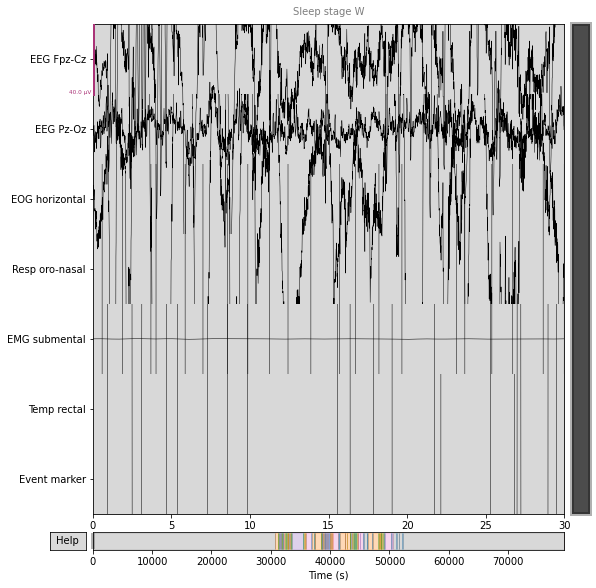

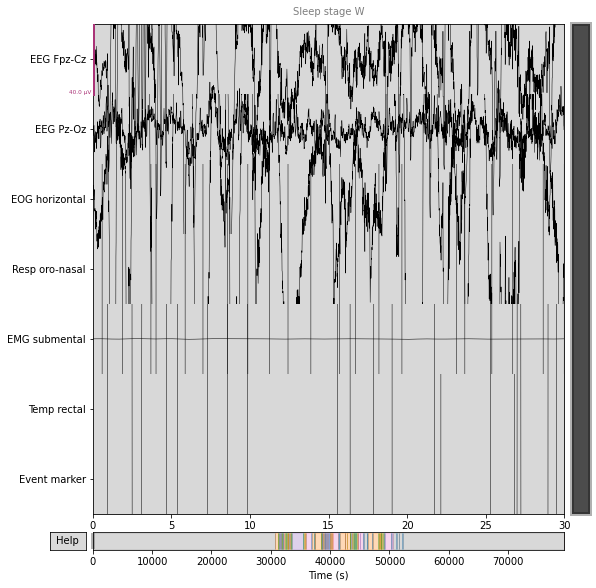

In [4]:
raw.plot(start=0,duration=30)

In [5]:
data = raw.get_data()
df = pd.DataFrame(data)
df = df.transpose()
df

,0,1,2,3,4,5,6
0,0.000005,-2.467399e-06,0.000017,-482.000000,0.000004,37.206452,920.000000
1,-0.000003,1.467399e-06,0.000016,-477.513343,0.000004,37.206154,919.251369
2,0.000001,-4.098901e-06,0.000010,-472.792126,0.000004,37.205865,918.501596
3,-0.000002,-2.659341e-06,0.000002,-467.836265,0.000004,37.205584,917.751318
4,-0.000005,-7.399267e-07,0.000008,-462.645805,0.000004,37.205314,917.001168
...,...,...,...,...,...,...,...
7949995,0.000011,-6.882051e-06,0.000082,120.019895,0.000003,37.430325,884.192595
7949996,0.000004,-8.609524e-06,0.000062,119.233020,0.000003,37.430079,883.955098
7949997,0.000005,-3.043223e-06,0.000070,118.437162,0.000003,37.429827,883.717035
7949998,-0.000005,-3.715018e-06,0.000081,117.632748,0.000003,37.429568,883.478461


In [6]:
annot_df = annot.to_data_frame()
annot_df

,onset,duration,description
0,1970-01-01 00:00:00,30630.0,Sleep stage W
1,1970-01-01 08:30:30,120.0,Sleep stage 1
2,1970-01-01 08:32:30,390.0,Sleep stage 2
3,1970-01-01 08:39:00,30.0,Sleep stage 3
4,1970-01-01 08:39:30,30.0,Sleep stage 2
...,...,...,...
149,1970-01-01 14:19:00,30.0,Sleep stage 1
150,1970-01-01 14:19:30,540.0,Sleep stage W
151,1970-01-01 14:28:30,150.0,Sleep stage 1
152,1970-01-01 14:31:00,27240.0,Sleep stage W


In [7]:
label = {'Sleep stage 1':1,'Sleep stage 2':2,'Sleep stage 3':3,'Sleep stage W':0,'Sleep stage 4':3,'Sleep stage R':4,'Sleep stage ?':-1,'Movement time':-1}
annot_df['description'] = annot_df['description'].replace(label)
annot_df

,onset,duration,description
0,1970-01-01 00:00:00,30630.0,0
1,1970-01-01 08:30:30,120.0,1
2,1970-01-01 08:32:30,390.0,2
3,1970-01-01 08:39:00,30.0,3
4,1970-01-01 08:39:30,30.0,2
...,...,...,...
149,1970-01-01 14:19:00,30.0,1
150,1970-01-01 14:19:30,540.0,0
151,1970-01-01 14:28:30,150.0,1
152,1970-01-01 14:31:00,27240.0,0


In [8]:
annot_df.groupby(['description']).sum()

,duration
description,
-1,6900.0
0,59910.0
1,1740.0
2,7500.0
3,6600.0
4,3750.0


In [9]:
annot_list = []
for i in range(0,153):
    dur = int(annot_df.iloc[i,1])
    des = int(annot_df.iloc[i,2])
    for j in range(0,dur):
        annot_list.append(des)

In [10]:
cols = ['Stages']
annot_list = pd.DataFrame(annot_list,columns=cols)
annot_list

,Stages
0,0
1,0
2,0
3,0
4,0
...,...
79495,0
79496,0
79497,0
79498,0


In [11]:
df = df.iloc[0:79500]
df

,0,1,2,3,4,5,6
0,0.000005,-2.467399e-06,0.000017,-482.000000,0.000004,37.206452,920.000000
1,-0.000003,1.467399e-06,0.000016,-477.513343,0.000004,37.206154,919.251369
2,0.000001,-4.098901e-06,0.000010,-472.792126,0.000004,37.205865,918.501596
3,-0.000002,-2.659341e-06,0.000002,-467.836265,0.000004,37.205584,917.751318
4,-0.000005,-7.399267e-07,0.000008,-462.645805,0.000004,37.205314,917.001168
...,...,...,...,...,...,...,...
79495,0.000033,1.068059e-05,0.000001,189.825492,0.000003,37.253137,905.379169
79496,0.000067,9.145055e-06,0.000002,189.069777,0.000003,37.253041,905.312811
79497,0.000025,7.993407e-06,-0.000031,188.308952,0.000003,37.252948,905.241653
79498,0.000032,7.609524e-06,-0.000053,187.543434,0.000003,37.252859,905.165756


In [12]:
df_stats = df.describe()

In [13]:
df_stats = df_stats.transpose()

In [14]:
df_stats

,count,mean,std,min,25%,50%,75%,max
0,79500.0,1.811138e-07,2.561919e-05,-0.000125,-0.000012,5.157509e-07,0.000013,0.000157
1,79500.0,-3.464879e-07,7.185456e-06,-0.000048,-0.000005,-4.520147e-07,0.000004,0.000056
2,79500.0,7.427894e-07,8.184781e-05,-0.000386,-0.000036,-2.463980e-07,0.000035,0.000445
3,79500.0,2.772545e+02,3.497052e+02,-907.900006,181.378693,2.211806e+02,317.617642,2015.034675
4,79500.0,3.422791e-06,7.126552e-08,0.000003,0.000003,3.422624e-06,0.000003,0.000004
5,79500.0,3.721832e+01,2.517206e-02,37.143711,37.200739,3.721811e+01,37.235538,37.325715
6,79500.0,8.896052e+02,5.765405e+01,-2.770382,879.616700,8.935192e+02,907.264523,1021.897795


In [15]:
def norm(x):
    return (x - df_stats['mean']) / df_stats['std']

df = norm(df)

In [16]:
df

,0,1,2,3,4,5,6
0,0.188754,-0.295167,0.192624,-2.171127,1.813066,-0.471340,0.527193
1,-0.107727,0.252439,0.186603,-2.158298,1.834960,-0.483177,0.514208
2,0.046004,-0.522223,0.108332,-2.144797,1.856496,-0.494663,0.501203
3,-0.100406,-0.321880,0.011998,-2.130625,1.877656,-0.505789,0.488190
4,-0.210214,-0.054755,0.084248,-2.115783,1.898424,-0.516544,0.475179
...,...,...,...,...,...,...,...
79495,1.283172,1.534638,0.005977,-0.250008,0.946352,1.383297,0.273597
79496,2.589885,1.320938,0.011998,-0.252169,0.930013,1.379503,0.272446
79497,0.975710,1.160663,-0.385380,-0.254344,0.913086,1.375822,0.271212
79498,1.250230,1.107238,-0.656320,-0.256533,0.895582,1.372258,0.269895


In [17]:
df.iloc[0,0]

0.18875446192609638

In [18]:
df.iloc[0,1]

-0.2951672478131336

In [19]:
a = annot_list.values

In [21]:
a[40000][0]

2

In [22]:
X0 = []
X1 = []
X2 = []
X3 = []
X4 = []
X5 = []
X6 = []

for i in range(0,79500):
    if(a[i][0] == 1):
        X0.append(df.iloc[i,0])
        X1.append(df.iloc[i,1])
        X2.append(df.iloc[i,2])
        X3.append(df.iloc[i,3])
        X4.append(df.iloc[i,4])
        X5.append(df.iloc[i,5])
        X6.append(df.iloc[i,6])


In [23]:
X0

[-0.12602791528237967,
 -0.2102138998846465,
 -0.2102138998846465,
 -0.32002170588760326,
 -0.06014323168060562,
 -0.4408102924908557,
 -0.272438323286322,
 -0.11138687448198545,
 0.5987036043371349,
 -0.23217546108523782,
 -0.4554513332912499,
 0.05332483452244969,
 0.24365836492757476,
 0.1155492579241252,
 0.3790879923312214,
 0.060645354922646805,
 0.08626717632333672,
 0.14483133952491364,
 0.1228697783243223,
 0.1228697783243223,
 0.18875446192609638,
 -0.14432921628287246,
 0.08626717632333672,
 0.38274825253132,
 0.16313264052540646,
 0.23267758432727906,
 0.33882513013013726,
 0.05698509472254826,
 0.25097888532777185,
 0.3717674719310243,
 -0.23217546108523782,
 -0.42250899149036286,
 -0.26145754268602633,
 -0.2797588436865191,
 -0.2760985834864206,
 -0.22119468048494217,
 -0.22851520088513927,
 -0.26877806308622343,
 -0.331002486487899,
 -0.11138687448198545,
 -0.2980601446870119,
 -0.4591115934913485,
 -0.6640861646968678,
 -0.47375263429174275,
 -0.2980601446870119,
 -0.34

In [24]:
X1

[0.47949481893698936,
 -0.856129434080464,
 -0.9629793743218603,
 -0.5222233708261007,
 -0.4955108857657516,
 -0.4687984007054026,
 0.4928510614671639,
 -0.33523597540365724,
 -0.5890045834769734,
 -0.12153609492086465,
 -0.7225670087787187,
 -0.20167355010191185,
 0.18565748327314957,
 -0.9095544042011621,
 0.18565748327314957,
 -1.1232542846839544,
 -0.8694856766106385,
 -0.24174227769243556,
 -0.709210766248544,
 0.25243869592402224,
 0.05209505797140428,
 -0.1883173075717373,
 -0.428729673114879,
 -0.24174227769243556,
 -0.34859221793383177,
 -0.3085234903433081,
 -0.7225670087787187,
 0.07880754303175336,
 -0.9229106467313366,
 -0.4420859156450535,
 -0.001329912149293858,
 -1.4438041054081434,
 -0.7492794938390677,
 -0.8427731915502894,
 -0.3886609455243554,
 -0.12153609492086465,
 -0.1883173075717373,
 -0.34859221793383177,
 0.10552002809210241,
 0.6130572442387346,
 0.45278233387664024,
 0.33257615110506944,
 -0.01468615467946839,
 1.0938819753250177,
 0.8935383373724,
 0.212369

In [25]:
X2

[-0.3612968940313014,
 -0.3793595424359954,
 -0.28302541761096045,
 -0.24087923800000766,
 -0.41548483924538354,
 -0.27700453480939574,
 -0.3552760112297367,
 -0.3552760112297367,
 -0.34925512842817197,
 -0.4094639564438189,
 -0.32517159722191324,
 -0.3733386596344307,
 -0.21679570679374893,
 -0.49375631566572437,
 -0.5660069092845006,
 -0.5539651436813713,
 -0.4756936672610304,
 -0.3733386596344307,
 -0.4877354328641597,
 -0.4516101360547715,
 -0.32517159722191324,
 -0.5057980812688538,
 -0.31915071442034854,
 -0.39742219084068936,
 -0.41548483924538354,
 -0.3612968940313014,
 -0.49375631566572437,
 -0.4094639564438189,
 -0.4877354328641597,
 -0.38538042523756005,
 -0.45763101885633634,
 -0.5660069092845006,
 -0.6322366201017121,
 -0.7406125105298765,
 -0.57804867488763,
 -0.5900904404907593,
 -0.6804036825142297,
 -0.6201948544985828,
 -0.5118189640704185,
 -0.5178398468719831,
 -0.5298816124751126,
 -0.5599860264829359,
 -0.4756936672610304,
 -0.5057980812688538,
 -0.493756315665724

In [26]:
X3

[0.25187600264690935,
 0.25243930308303625,
 0.2530098321112915,
 0.2535873055516652,
 0.254171433723881,
 0.25476192164844697,
 0.25535846925187955,
 0.25596077157595365,
 0.2565685189908209,
 0.2571813974118522,
 0.257799088520038,
 0.25842126998579285,
 0.25904761569600193,
 0.2596777959841398,
 0.2603114778633023,
 0.2609483252619751,
 0.261587999262371,
 0.2622301583411635,
 0.26287445861243863,
 0.2635205540726888,
 0.26416809684767106,
 0.26481673744094736,
 0.2654661249839286,
 0.26611590748723296,
 0.26676573209318327,
 0.26741524532924854,
 0.26806409336225057,
 0.2687119222531488,
 0.2693583782122077,
 0.270003107854368,
 0.27064575845463096,
 0.2712859782032619,
 0.2719234164606317,
 0.27255772401150075,
 0.27318855331856207,
 0.27381555877505304,
 0.2744383969562456,
 0.27505672686963195,
 0.2756702102036175,
 0.2762785115745326,
 0.27688129877178214,
 0.2774782430009469,
 0.27806901912465426,
 0.278653305901039,
 0.2792307862196109,
 0.27980114733435535,
 0.28036408109388

In [27]:
X4

[0.690599337033428,
 0.6996334267178893,
 0.7088111740258763,
 0.7181292240179395,
 0.7275840086352973,
 0.7371717486726722,
 0.7468884559365123,
 0.7567299355863998,
 0.7666917886587538,
 0.7767694147706546,
 0.7869580150019037,
 0.7972525949533704,
 0.8076479679794516,
 0.8181387585921467,
 0.8287194060344728,
 0.8393841680203973,
 0.8501271246388031,
 0.8609421824182901,
 0.8718230785502565,
 0.8827633852665769,
 0.893756514369112,
 0.9047957219074142,
 0.9158741130012181,
 0.9269846468041009,
 0.9381201416044697,
 0.9492732800603632,
 0.9604366145637101,
 0.9716025727303319,
 0.9827634630113334,
 0.9939114804218091,
 1.005038712382351,
 1.0161371446691179,
 1.0271986674677032,
 1.038215081526514,
 1.049178104404652,
 1.060079376809823,
 1.0709104690212508,
 1.0816628873927554,
 1.0923280809310056,
 1.1028974479441058,
 1.113362342754988,
 1.1237140824750291,
 1.1339439538321994,
 1.144043220048909,
 1.1540031277639347,
 1.1638149139933995,
 1.1734698131252317,
 1.182959063941819,
 

In [28]:
X5

[-2.226977354240442,
 -2.244278877988697,
 -2.2607895096564223,
 -2.276499297739199,
 -2.291398879580453,
 -2.3054794878603833,
 -2.318732956620258,
 -2.331151726815885,
 -2.342728851396573,
 -2.3534579999090277,
 -2.363333462615454,
 -2.3723501541334833,
 -2.380503616588897,
 -2.387790022278321,
 -2.394206175847254,
 -2.3997495159746847,
 -2.4044181165671072,
 -2.4082106874636464,
 -2.4111265746486095,
 -2.4131657599711875,
 -2.414328860378516,
 -2.41461712665927,
 -2.414032441699211,
 -2.4125773182523464,
 -2.410254896229684,
 -2.407068939504732,
 -2.403023832250425,
 -2.3981245747919497,
 -2.392376778998893,
 -2.3857866632068476,
 -2.378361046681162,
 -2.370107343624819,
 -2.3610335567329828,
 -2.351148270308044,
 -2.340460642932057,
 -2.3289803997078646,
 -2.3167178240751154,
 -2.3036837492079503,
 -2.289889548999725,
 -2.2753471286468967,
 -2.2600689148340645,
 -2.244067845536803,
 -2.2273573594383502,
 -2.2099513849810277,
 -2.191864329060025,
 -2.173111065358405,
 -2.15370692234

In [29]:
X6

[0.02084781192309033,
 0.018718044635031773,
 0.016575074054354877,
 0.014422845103498323,
 0.012265271296126375,
 0.010106230828499234,
 0.007949562718069892,
 0.005799062992872675,
 0.0036584809351798493,
 0.0015315153829106535,
 -0.0005781889078038132,
 -0.0026670448356265193,
 -0.0047315264592528465,
 -0.0067681724316967775,
 -0.008773589360546815,
 -0.010744455091099727,
 -0.012677521909370926,
 -0.014569619662124207,
 -0.016417658791083346,
 -0.018218633278614182,
 -0.019969623502195458,
 -0.021667798995128783,
 -0.023310421111070154,
 -0.024894845589930065,
 -0.026418525022925788,
 -0.027879011214575342,
 -0.029273957439584393,
 -0.03060112059258909,
 -0.03185836322890136,
 -0.03304365549457054,
 -0.03415507694389817,
 -0.03519081824306276,
 -0.03614918275824392,
 -0.03702858802698736,
 -0.03782756711152741,
 -0.03854476983303365,
 -0.03917896388562802,
 -0.03972903582946868,
 -0.040193991961928216,
 -0.04057295906636951,
 -0.04086518503784867,
 -0.0410700393854,
 -0.04118701361

In [30]:
import scipy.stats as st

In [31]:
st.t.interval(alpha=0.90, df=len(X0)-1,
              loc=np.mean(X0),
              scale=st.sem(X0))

C:\Users\HP\AppData\Local\Temp/ipykernel_8980/717390456.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X0)-1,


(-0.10866834809168463, -0.026494759025329544)

In [32]:
st.t.interval(alpha=0.90, df=len(X1)-1,
              loc=np.mean(X1),
              scale=st.sem(X1))

C:\Users\HP\AppData\Local\Temp/ipykernel_8980/3723661251.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X1)-1,


(-0.057565156264556744, 0.02443160619309949)

In [33]:
st.t.interval(alpha=0.90, df=len(X2)-1,
              loc=np.mean(X2),
              scale=st.sem(X2))

C:\Users\HP\AppData\Local\Temp/ipykernel_8980/2606998258.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X2)-1,


(0.026975795810224294, 0.13728569113281808)

In [34]:
st.t.interval(alpha=0.90, df=len(X3)-1,
              loc=np.mean(X3),
              scale=st.sem(X3))

C:\Users\HP\AppData\Local\Temp/ipykernel_8980/3860025406.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X3)-1,


(-0.07117249893510315, -0.06075753143813466)

In [35]:
st.t.interval(alpha=0.90, df=len(X4)-1,
              loc=np.mean(X4),
              scale=st.sem(X4))

C:\Users\HP\AppData\Local\Temp/ipykernel_8980/1715302051.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X4)-1,


(-0.6157742473998753, -0.5258184026922939)

In [36]:
st.t.interval(alpha=0.90, df=len(X5)-1,
              loc=np.mean(X5),
              scale=st.sem(X5))

C:\Users\HP\AppData\Local\Temp/ipykernel_8980/3134699342.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X5)-1,


(-0.12078026859698694, -0.06780542347050164)

In [37]:
st.t.interval(alpha=0.90, df=len(X6)-1,
              loc=np.mean(X6),
              scale=st.sem(X6))

C:\Users\HP\AppData\Local\Temp/ipykernel_8980/2686493811.py:1: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  st.t.interval(alpha=0.90, df=len(X6)-1,


(-0.04264707785959576, -0.007897410833702465)